In [40]:
import pandas as pd
import numpy as np

In [41]:
players = pd.read_csv("./dataset/players_22.csv")
players.head()

C:\Users\sayye\AppData\Local\Temp\ipykernel_14608\3998543560.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("./dataset/players_22.csv")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [42]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]
# look at the features if there's any missing value drop the column
players = players.dropna(subset=features)
data = players[features].copy()


In [43]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [44]:
# scaling the data between 0 and 10
data = ((data - data.min())/(data.max() - data.min()))*10 + 1
data.head()

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926
2,10.565217,10.130435,8.711016,3.319231,8.407407
3,10.565217,10.130435,8.711016,7.649329,5.814815
4,10.565217,10.130435,11.000000,7.468908,6.185185


In [45]:
def find_centroids(data, k):
    centroids = []
    for i in range(k):
#        sample method returns series of number that must be converted into float or a single number 
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [47]:
centroids = find_centroids(data, 5)
centroids

,0,1,2,3,4
overall,6.652174,5.782609,1.434783,4.695652,4.695652
potential,5.347826,6.652174,7.521739,6.434783,5.130435
wage_eur,1.042918,1.000000,1.443491,1.042918,1.128755
value_eur,1.007784,1.027888,1.159337,1.045930,1.024022
age,7.666667,3.592593,2.851852,5.444444,2.111111


In [54]:
def get_labels(data, centroids):
    # np.sqrt(((data - centroids.iloc[:, 0])**2).sum(axis=1))
#     apply method in pd means iterate through all the columns in the data
    distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
    # find which cluster players are in or get the min index value
    return distances.idxmin(axis=1)

In [55]:
labels = get_labels(data, centroids)

In [56]:
labels.value_counts()

1    6003
4    4915
3    4547
0    3274
2     426
dtype: int64

In [58]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [59]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [60]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

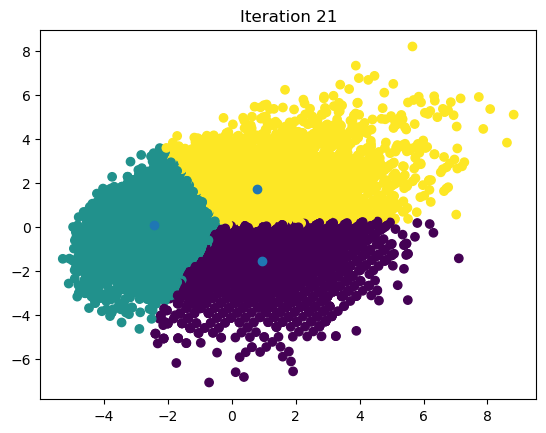

In [62]:
max_iterations = 100
centroid_count = 3

centroids = find_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [65]:
centroids

,0,1,2
overall,5.200401,3.443294,6.336567
potential,4.894314,5.362259,7.107863
wage_eur,1.130802,1.031502,1.460086
value_eur,1.049844,1.029525,1.313192
age,5.962199,2.678624,3.877681


In [66]:
labels.value_counts()

0    7192
1    6198
2    5775
dtype: int64

In [67]:
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
199,Pepe,82,82,14000.0,5500000.0,38
284,Joaquín,81,81,23000.0,8500000.0,39
292,José Fonte,81,81,30000.0,4600000.0,37
388,G. Buffon,80,80,18000.0,2300000.0,43
509,Iniesta,79,79,10000.0,5500000.0,37
...,...,...,...,...,...,...
18890,S. Haokip,51,51,500.0,60000.0,28
18971,Lalkhawpuimawia,51,51,500.0,60000.0,29
19032,Song Yue,50,50,2000.0,40000.0,29
19100,J. Russell,49,49,500.0,15000.0,36
